# 1) Loading dataset and getting to know it

2022-12-15 10:10:11.014334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of 9 samples in the MNIST training set


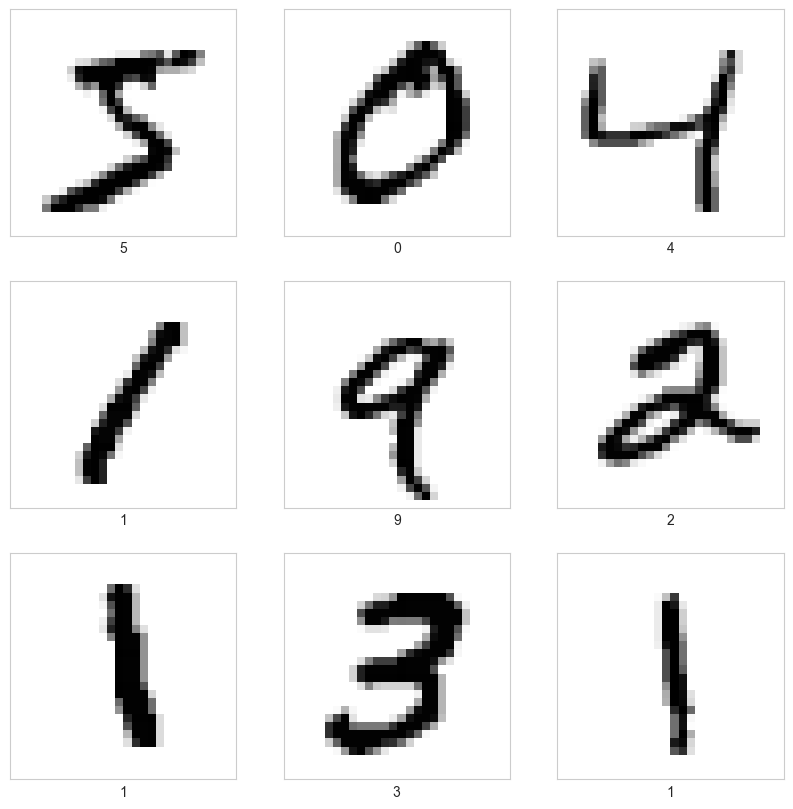

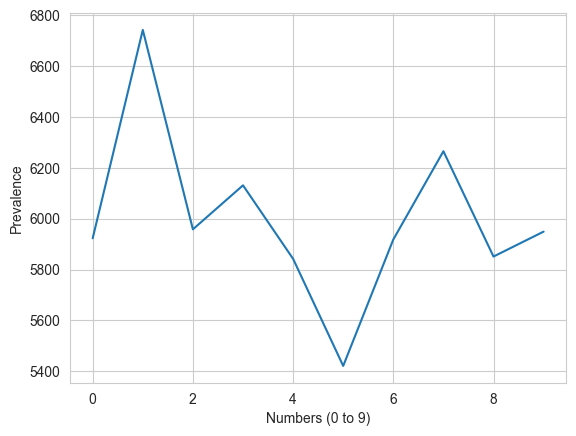

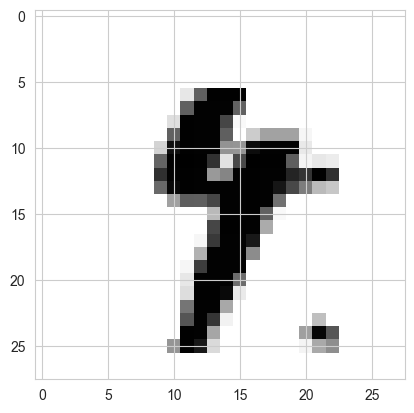

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
#from keras.utils.vis_utils import plot_model
import numpy as np
import seaborn as sn

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Unpack and load dataset, there are samples to train the network and ones to test it afterwards

# -- Variables --
k = 0
y = 0
zeros = 0
ones = 0
twos = 0
threes = 0
fours = 0
fives = 0
sixs = 0
sevens = 0
eigths = 0
nines = 0

#  -- Getting to know the data --
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# -- Plot some data samples --
print('\n Plot of 9 samples in the MNIST training set')
numbers_to_display = 9
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# -- Figure out how often each number occurs in the training set --
for y in y_train:
    if y == 0:
        zeros = zeros+1
    elif y == 1:
        ones = ones+1
    elif y == 2:
        twos = twos+1
    elif y == 3:
        threes = threes+1
    elif y == 4:
        fours = fours+1
    elif y == 5:
        fives = fives+1
    elif y == 6:
        sixs = sixs+1
    elif y == 7:
        sevens = sevens+1
    elif y == 8:
        eigths = eigths+1
    elif y == 9:
        nines = nines+1

# -- Print out how often each number occurs: --
#print("Number of zeros: ", zeros)
#print("Number of ones: ", ones)
#print("Number of twos: ", twos)
#print("Number of threes: ", threes)
#print("Number of fours: ", fours)
#print("Number of fives: ", fives)
#print("Number of sixs: ", sixs)
#print("Number of sevens: ", sevens)
#print("Number of eights: ", eigths)
#print("Number of nines: ", nines)
#print("Sum of all: ", zeros+ones+twos+threes+fours+fives+sixs+sevens+eigths+nines)

plt.plot([zeros, ones, twos, threes, fours, fives, sixs, sevens, eigths, nines])
plt.xlabel("Numbers (0 to 9)")
plt.ylabel("Prevalence")
plt.show()

# -- Preparing the images by making the edges sharper, every color value under 127 becomes zero, every one over 127 becomes 255, this could make it easier for the model to decide for a number --
#for n in range(0,59999):
 #  for m in range(0,27):
  #      for o in range(0,27):
   #         if x_train[n][m,o] <= 127:
    #            x_train[n][m,o] = 0
     #       elif x_train[n][m,o] > 127:
      #          x_train[n][m,o] = 255

plt.imshow(x_train[6879], cmap=plt.cm.binary)           # the images are now way sharper, maybe this helps the model to detect them right, analyse on this will be made later on in the code

# Comments on "Loading dataset and getting to know it"
If we work with neural networks and data sets, it is important to get to know our data. Therefor I printed out the shape of our training and test data samples. As we can see there are 60k training samples and 10k test samples. Each sample consists of an image with 28 by 28 pixels, showing a handwritten number. For every picture there is a groundtruth number. This number tells us which number the picture is really showing. The challenge for the neural network is now going to be recognizing which number every picture is showing. To get further information about our dataset, I developed some code lines to find out, how often each number occurs in the dataset. Above you can see a graph showing you how often each number from 0 to 9 occurs in the MNIST dataset. This could maybe help us later on, if we look on the numbers that were perceived wrongly. Additionally I sharpened the edges of the images by changing the colour values. The idea behind this was that if the handwritten digit's edges and corners are sharper it may help the model to perceive them better. This happens from line 86 to line 92. It is commented out because it did not work as planned, but it was worth a try.

# 2) Defining the model

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)                 # Scale data to values from 0 to 1, this makes it easier for the model to learn
x_test = tf.keras.utils.normalize(x_test, axis=1)

# -- Define the architecture of the model --
model = tf.keras.models.Sequential()                                # This is the most common model type
model.add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(padding='same'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())                                # INPUT Layer: Data shape is not 28x28 anymore but flatten to 784x1 (one dimensional)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))      # First HIDDEN Layer: 128 units/neurons per layer, rectified linear unit activation function
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))    # OUTPUT Layer, 10 neurons for 10 possible outputs of the network (numbers 0-9), softmax for probability distribution

#print(model.summary())

2022-12-15 10:10:35.179996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Comments on "Defining the model"
The most important thing when it comes to digit recognition is the model's architecture. In the theory part from Frank Hafner we learned that for digit recognition a network with alternating convolution and subsampling layers is very good. So I took this as a ground structure for my solution. When the feature extraction is done, I use a softmax layer for the classification. This gives a probability distribution. This distribution is done by the activation function "softmax". The network then decides for the number with the highest probability. To improve on this ground structure there are several things I worked on to improve my network's performance, in other words to push the validation accuracy up and the validation loss down.
Things I worked on:
1) How many alternations from convolution to subsampling layer
    By doing more alternations the network gets better. But it also needs more time and energy to train. Because I am not forced to reach an accuracy of almost 100% I decided for two alternations, which is already quite good. The graph in section 4 shows how the validation accuracy behaves in dependency on the number of alternations.
2) Number of neurons in the dense layer
    It is the same here. The more I increased the number of neurons in the dense layer, the better the network got. But it also took me longer to train it. I decided for 128 neurons in the dense layer as a compromise out of performance and time/energy consumption. For a graph on this look into section 4.
3) Adding a dropout layer
    To prevent the model from overfitting but still be able to train many epochs I added dropout layers with a dropout of 0.4. This was the best in my experiments. In section 4 there is a graph showing you the dependency between validation accuracy of the model and the used dropout.

# 3) Training the model

In [4]:
# -- Define the training parameters for the model --
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# -- Training the model --
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2485 - accuracy: 0.9230
Epoch 2/4
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1062 - accuracy: 0.9683
Epoch 3/4
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0805 - accuracy: 0.9751
Epoch 4/4
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0687 - accuracy: 0.9793


# Comments on "Training the model"
If the model is done, it comes to training it. At first I thought that increasing the training epochs would give good accuracy and a low loss. For a certain number of training epochs this is true but at some point there is something called over fitting. This is when your training accuracy gets really high and your training loss really low. But if the model then is validated it does not perform very well. Training and validation accuracy differ a lot from each other, as well as the loss does. Validation accuracy is much lower than the training's one and the loss is much higher than the training's one. To prevent overfitting and keep a good performance even in the validation set I decided for four training epochs. This results in a good performance and also has advantages when it comes to training time.

# 4) Evaluating the model

313/313 [==============================] - 4s 12ms/step - loss: 0.0347 - accuracy: 0.9887
0.03470676764845848 0.9886999726295471
313/313 [==============================] - 4s 11ms/step


/var/folders/15/2t6ny8yn7sj34rd8pbcsx1z40000gn/T/ipykernel_1589/4168796694.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


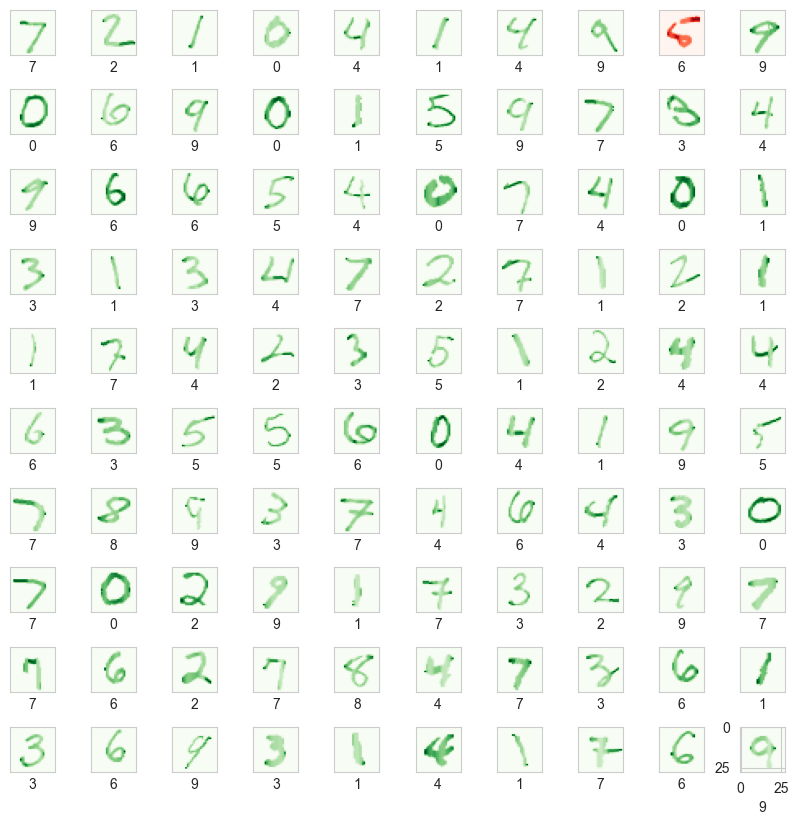

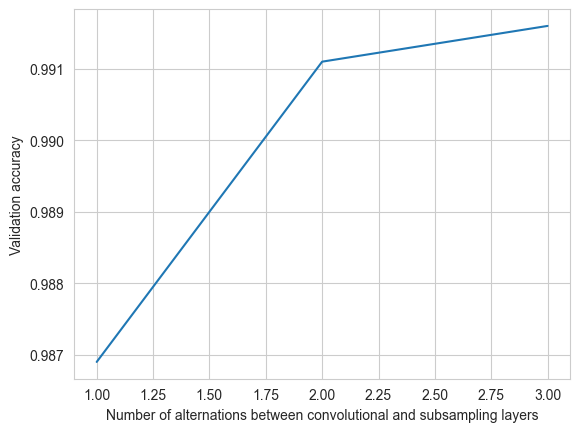

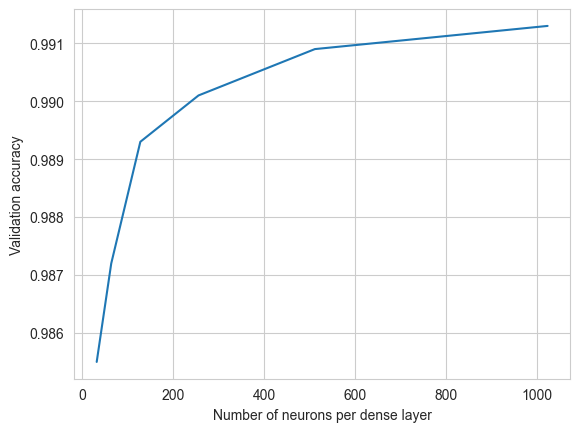

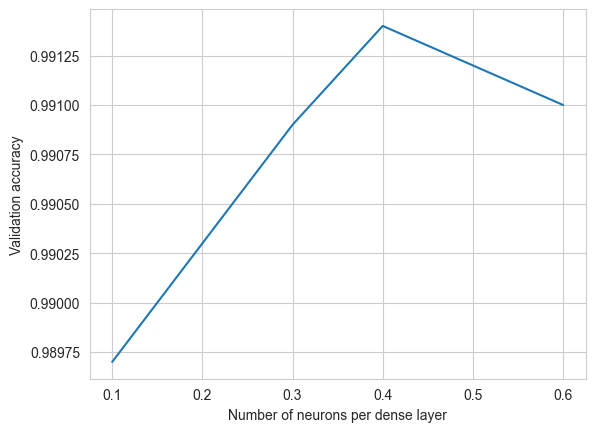

In [9]:
# -- Evaluating the model --
val_loss, val_acc = model.evaluate(x_test, y_test)      # See how good the network is with unknown data, loss a bit higher and accuracy a bit lower, this is what you should expect, if delta to                                                             training set is too big then network is overfitted
print(val_loss, val_acc)

predictions = model.predict([x_test])
predictions = np.argmax(predictions, axis=1)

# -- Visualize the results with plots --
# Plot 1, green/red images
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=0.5, wspace=0.8)
plt.show()

# Plot 2, alternations from convolution to subsampling layer
plt.plot([1, 2, 3],[0.9869, 0.9911, 0.9916])
plt.xlabel("Number of alternations between convolutional and subsampling layers")
plt.ylabel("Validation accuracy")
plt.show()

# Plot 3, number of neurons in the dense layer
plt.plot([32, 64, 128, 256, 512, 1024],[0.9855, 0.9872, 0.9893, 0.9901, 0.9909, 0.9913])
plt.xlabel("Number of neurons per dense layer")
plt.ylabel("Validation accuracy")
plt.show()

# Plot 4, dropout
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6],[0.9897, 0.9903, 0.9909, 0.9914, 0.9912, 0.9910])
plt.xlabel("Dropout")
plt.ylabel("Validation accuracy")
plt.show()

# Comments on "Evaluating the model"
In this section I want to show the results of my model as well as how the different parameters (mentioned in section 2) that were changed during the development affected the validation accuracy. One important thing first that the validation accuracy shows us: The model did not overfit.
As the graphs show, the model is not the best it could be. As mentioned in section 2 I decided not only in the purpose of performance but also efficiency and time/energy consumption. The first plot shows quite good some examples which the model did not perceive correctly. These are marked in red. It is clear to say that if the model was wrong, the number was not written very well. In section 5 I want to talk about this a little bit more.

# 5) Analyse of the result

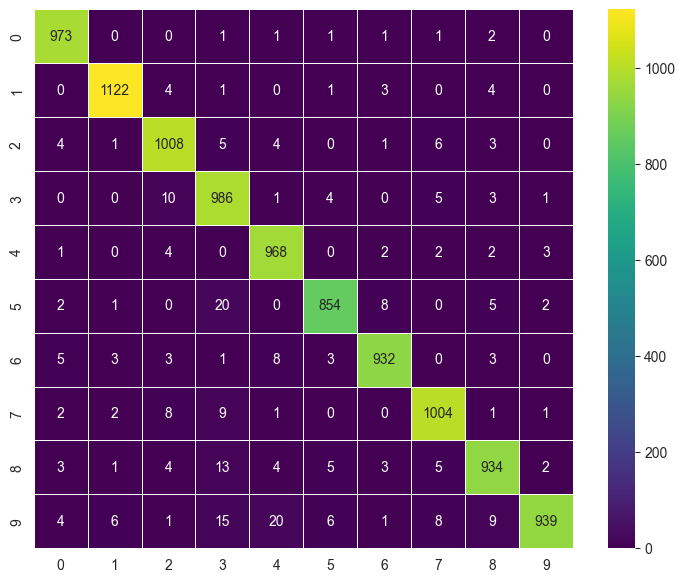

In [13]:
# -- Analyse the result --
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)

plt.show()

# Comments on "Analyse of the result"
To analyse the result of my model I used the so-called "confusion matrix". It shows how often each digit has been perceived as which number. Luckily you can find the highest numbers in the first diagonal which means the digit has been perceived correctly. If you take a closer look at the matrix there are two things that will catch your eye. First: Digit 3 is very often perceived as a five. Second: Digit 4 is very often perceived as a nine. in my opinion this is because these numbers are pretty similar, above all there are badly handwritten. For example the four pretty easy becomes a nine if you make the vertical line a bit longer and curve it. another reason why the 4 is perceived wrong sometimes could be that digit 4 does not occur as often as other digits in the training set. If we take a look at the graph in section 1 we see that about 5800 samples of the 4 is very low compared to other digits. These are the reasons why the model gets in trouble keeping apart these numbers. On the other hand there are numbers like the nine which is perceived correctly almost every time. To me this is because if you handwrite a nine it is not likely to look like another number, because the differences to the other numbers are pretty big, although the other way round can happen. To conclude we can say that the model is pretty good in perceiving handwritten numbers but it is not perfect.


# Outlook
There are some things that can be done if someone wants to develop this model in further steps. Increasing the number of alternations from subsampling and convolution layers and the number of neurons per dense layer. It would take plenty more time to train the model, but most likely it would also end up in a higher validation accuracy. The other thing that can be done is researching about and playing around with the optimizer, loss and metrics. I heard from a model which achieves almost 100% of validation accuracy, so there is plenty of room to the top :)...